In [27]:
import cv2   
import numpy as np   
import matplotlib.pyplot as plt
import imutils

In [39]:
coordinates = []
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(img, str(x) + ',' +
#                     str(y), (x,y), font,
#                     1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, str(b) + ',' +
#                     str(g) + ',' + str(r),
#                     (x,y), font, 1,
#                     (255, 255, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])

In [40]:
fileName = 'vis_Bakul_003_000470.png'
imgDirPath = 'F:\\IIIT-H Work\\win_det_heatmaps\\rrcServerData\\templateMatching\\images\\mobilenet\\'
imgPath = imgDirPath + fileName
# Reading the main image   
img = cv2.imread(imgPath,1)
img_rgb = np.copy(img)

339   106
344   247
500   252
504   108


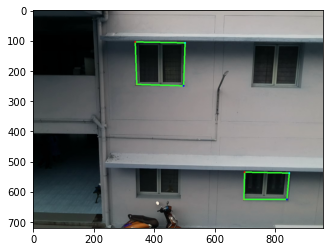

In [41]:
plt.figure()
plt.imshow(img)
cv2.imshow('image', img)

# setting mouse hadler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

In [31]:
print(coordinates)

[[737, 2], [727, 130], [882, 130], [886, 2]]


In [17]:
coordinates[0]

[734, 3]

In [42]:
# Loop through list to find range of x and y

def calculateRange(coordinates, padding, imageShape):
    minX = maxX = coordinates[0][0]
    minY = maxY = coordinates[0][1]
    startX = startY = endX = endY = 0
    h,w,c = imageShape
    for i in range(len(coordinates)):
        if minX > coordinates[i][0]:
            minX = coordinates[i][0]
        if maxX < coordinates[i][0]:
            maxX = coordinates[i][0]

        if minY > coordinates[i][1]:
            minY = coordinates[i][1]
        if maxY < coordinates[i][1]:
            maxY = coordinates[i][1]
    
    if (minX - padding < 0):
        startX = 0
    else:
        startX = minX - padding
    if (minY - padding < 0):
        startY = 0
    else:
        startY = minY - padding
    if (maxX + padding >= w):
        endX = w - 1
    else:
        endX = maxX + padding
    if (maxY + padding >= h):
        endY = h - 1
    else:
        endY = maxY + padding
    return startX, endX, startY, endY

329 514 96 262


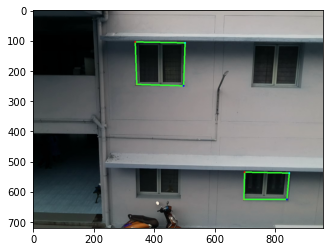

In [43]:
padding = 10
startX, endX, startY, endY = calculateRange(coordinates, padding, img_rgb.shape)
plt.imshow(img_rgb)
print(startX, endX, startY, endY)

In [9]:
img_rgb.shape

(720, 960, 3)

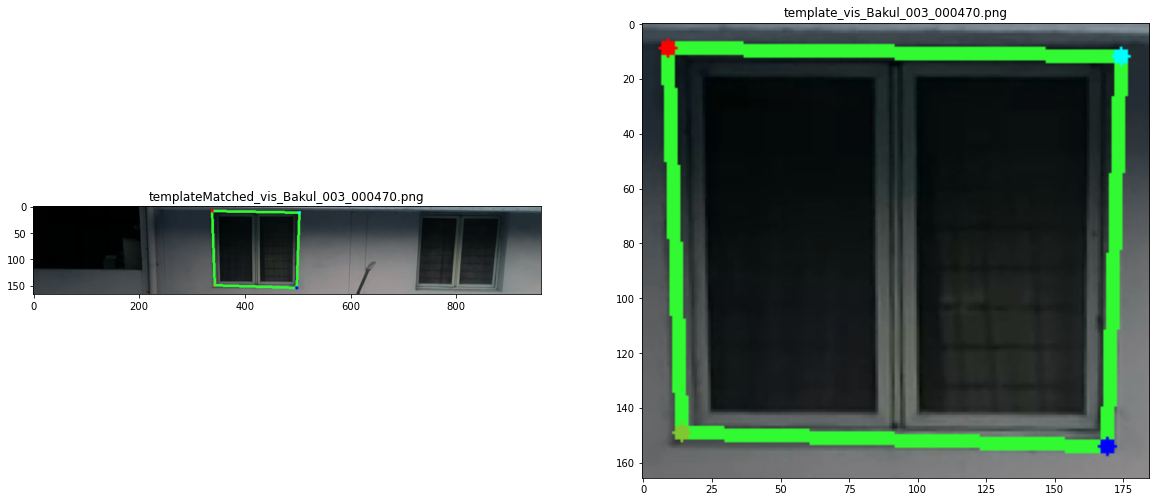

In [44]:
template = img_rgb[startY:endY, startX:endX, :]
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.imshow(template)
plt.title('template_' + str(fileName)) 
searchImg = img_rgb[startY:endY, : ,:]
plt.subplot(1, 2, 1)
plt.imshow(searchImg)
plt.title('templateMatched_' + str(fileName)) 
plt.show()

Text(0.5, 1.0, 'rotatedTemplate_vis_Bakul_003_000470.png')

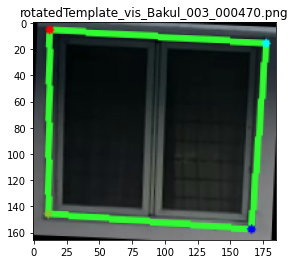

In [46]:
# Apply rotation and shear to template
rotatedTemplate = imutils.rotate(template, -2.5)
plt.imshow(rotatedTemplate)
plt.title('rotatedTemplate_' + str(fileName)) 

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), array([324, 325, 326, 327, 328, 329, 330, 331, 332, 709, 710, 711],
      dtype=int64))


Text(0.5, 1.0, 'Result on search Image')

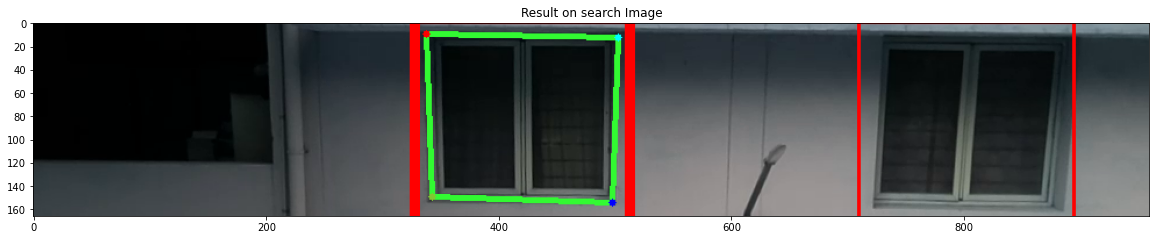

In [50]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)   
template_gray = cv2.cvtColor(rotatedTemplate, cv2.COLOR_BGR2GRAY)   
searchImg_gray = cv2.cvtColor(searchImg, cv2.COLOR_BGR2GRAY)

# Store width in variable w and height in variable h of template  
w, h = template_gray.shape[::-1]   
# Now we perform match operations.   
res = cv2.matchTemplate(searchImg_gray,template_gray,cv2.TM_CCOEFF_NORMED)   
# Declare a threshold   
threshold = 0.66
# Store the coordinates of matched region in a numpy array   
loc = np.where( res >= threshold)
print(loc)
# Draw a rectangle around the matched region.   
for pt in zip(*loc[::-1]):   
    cv2.rectangle(searchImg, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)   
# Now display the final matched template image   
plt.figure(figsize=(20,10))
plt.imshow(searchImg)  
plt.title('Result on search Image')
#cv2.imwrite('Template_' +  '0.6_threshold_' + fileName, template)
#cv2.imwrite('TemplateMatched_'  + '0.6_threshold_' + fileName, searchImg)